# Last FM hometask <br>
https://www.kaggle.com/ravichaubey1506/lastfm <br>
1. Выбрать данные по странам своей группы (совместно): <br>
    3530203_70101: Germany, Netherlands <br>
    3530203_70102: Belarus, Ukraine, Poland, Russian Federation<br>
    3530903_70301: Sweden, Finland, Norway, Denmark, Iceland<br>
    3530903_70302: Spain, Portugal, France, Italy, Belgium<br>
    
2. Попытаться найти полезные с точки зрения продвижения групп (или еще чего-нибудь) и нетривиальные правила, используя алгоритмы Apriori, FPGrowth, FPMax и всевозможные метрики. Хотя бы 5 правил.
3. Вывести эти правила в отдельных ячейках. 
4. Подумать, как можно было бы использовать полученные правила.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("lastfm.csv")
data.head(30)

,user,artist,sex,country
0,1,red hot chili peppers,f,Germany
1,1,the black dahlia murder,f,Germany
2,1,goldfrapp,f,Germany
3,1,dropkick murphys,f,Germany
4,1,le tigre,f,Germany
5,1,schandmaul,f,Germany
6,1,edguy,f,Germany
7,1,jack johnson,f,Germany
8,1,eluveitie,f,Germany
9,1,the killers,f,Germany


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289955 entries, 0 to 289954
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user     289955 non-null  int64 
 1   artist   289955 non-null  object
 2   sex      289955 non-null  object
 3   country  289955 non-null  object
dtypes: int64(1), object(3)
memory usage: 8.8+ MB


In [4]:
data.shape

(289955, 4)

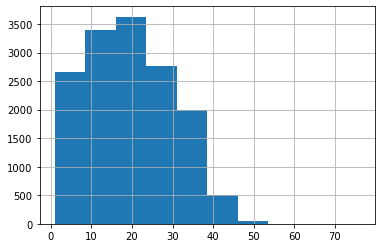

In [5]:
data.groupby(['user']).size().hist()
data.groupby(['user']).size().describe()

In [6]:
data[data.artist.str.contains(',')].shape[0]

0

In [7]:
data['sex'].unique().tolist()

['f', 'm']

In [8]:

data['country'].unique().tolist()

['Germany',
 'United States',
 'United Kingdom',
 'Finland',
 'Portugal',
 'Italy',
 'Austria',
 'Korea, Republic of',
 'Sweden',
 'Japan',
 'Greece',
 'Netherlands',
 'Iran, Islamic Republic of',
 'Ukraine',
 'Thailand',
 'Russian Federation',
 'Australia',
 'Mexico',
 'Norway',
 'Poland',
 'Canada',
 'Estonia',
 'Spain',
 'Uruguay',
 'Lithuania',
 'Czech Republic',
 'France',
 'Turkey',
 'Argentina',
 'Slovakia',
 'Brazil',
 'Belgium',
 'Romania',
 'Chile',
 'Singapore',
 'Ghana',
 'Virgin Islands, U.s.',
 'Syrian Arab Republic',
 'Slovenia',
 'China',
 'Andorra',
 'Switzerland',
 'Israel',
 'Iceland',
 'India',
 'Bulgaria',
 'Croatia',
 'Peru',
 'Bosnia and Herzegovina',
 'Georgia',
 'Hungary',
 'Belarus',
 'Colombia',
 'Denmark',
 'Malta',
 'New Zealand',
 'Uganda',
 'Latvia',
 'Serbia',
 'Ireland',
 'Saudi Arabia',
 'Antarctica',
 'Venezuela',
 'Cyprus',
 'Togo',
 'Hong Kong',
 'Puerto Rico',
 'Ecuador',
 'Malaysia',
 'Taiwan',
 'Guatemala',
 'Panama',
 'Moldova',
 'South Africa',

In [9]:
data_by_users = data.groupby(['user', 'sex', 'country'])['artist'].apply(lambda x: ','.join(x)).reset_index()
data_by_users

,user,sex,country,artist
0,1,f,Germany,"red hot chili peppers,the black dahlia murder,..."
1,3,m,United States,"devendra banhart,boards of canada,cocorosie,ap..."
2,4,m,United Kingdom,"tv on the radio,tool,kyuss,dj shadow,air,a tri..."
3,5,m,Finland,"dream theater,ac/dc,metallica,iron maiden,bob ..."
4,6,m,Portugal,"lily allen,kanye west,sigur rós,pink floyd,ste..."
...,...,...,...,...
14995,19713,m,Ukraine,"armin van buuren,above & beyond,atb,ferry cors..."
14996,19714,m,United Kingdom,"misfits,type o negative,arch enemy,red hot chi..."
14997,19715,m,United Kingdom,"abba,james blunt,jason mraz,amy winehouse,quee..."
14998,19717,m,Brazil,"marilyn manson,beyoncé,madonna,t.a.t.u.,katy p..."


In [10]:
data_by_users['country'].value_counts()

United States               2905
Germany                     1257
United Kingdom              1256
Poland                       983
Russian Federation           785
                            ... 
Nauru                          1
Tokelau                        1
Northern Mariana Islands       1
American Samoa                 1
Armenia                        1
Name: country, Length: 159, dtype: int64

In [11]:
data_by_users_task = data_by_users[data_by_users.country.isin(['Belarus', 'Ukraine', 'Poland', 'Russian Federation'])]
data_by_users_task

,user,sex,country,artist
23,35,m,Ukraine,"radiohead,the kooks,coldplay,nine inch nails,h..."
26,39,m,Russian Federation,"britney spears,a-ha,joss stone,christina aguil..."
36,50,f,Russian Federation,"the ataris,yann tiersen,the smashing pumpkins,..."
44,64,m,Poland,"apparat,drowning pool,armin van buuren,alexiso..."
58,82,m,Russian Federation,"p.o.d.,chimaira,arch enemy,scar symmetry,slipk..."
...,...,...,...,...
14985,19703,f,Poland,"the offspring,pearl jam,the smashing pumpkins,..."
14988,19706,f,Russian Federation,"enigma,pink floyd,the offspring,scorpions"
14992,19710,f,Russian Federation,"vnv nation,nine inch nails,kmfdm,apoptygma ber..."
14994,19712,m,Poland,"john williams,abba,vangelis,hans zimmer,céline..."


In [12]:
data_by_users_task['country'].value_counts()

Poland                983
Russian Federation    785
Ukraine               183
Belarus                56
Name: country, dtype: int64

In [13]:
dummy_data_by_users_task = data_by_users_task['artist'].str.get_dummies(',')
dummy_data_by_users_task.head()

,...and you will know us by the trail of dead,2pac,3 doors down,30 seconds to mars,311,36 crazyfists,44,50 cent,65daysofstatic,[unknown],...,weezer,wilco,within temptation,wolfgang amadeus mozart,wu-tang clan,yann tiersen,yeah yeah yeahs,yellowcard,zero 7,Édith piaf
23,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
44,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
dummy_data_by_users_task.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 23 to 14995
Columns: 994 entries, ...and you will know us by the trail of dead to Édith piaf
dtypes: int64(994)
memory usage: 15.2 MB


In [15]:
data_by_users_task = pd.concat([data_by_users_task, dummy_data_by_users_task], axis = 1)
data_by_users_task.head()

,user,sex,country,artist,...and you will know us by the trail of dead,2pac,3 doors down,30 seconds to mars,311,36 crazyfists,...,weezer,wilco,within temptation,wolfgang amadeus mozart,wu-tang clan,yann tiersen,yeah yeah yeahs,yellowcard,zero 7,Édith piaf
23,35,m,Ukraine,"radiohead,the kooks,coldplay,nine inch nails,h...",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,39,m,Russian Federation,"britney spears,a-ha,joss stone,christina aguil...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,50,f,Russian Federation,"the ataris,yann tiersen,the smashing pumpkins,...",0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
44,64,m,Poland,"apparat,drowning pool,armin van buuren,alexiso...",0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
58,82,m,Russian Federation,"p.o.d.,chimaira,arch enemy,scar symmetry,slipk...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
data_by_users_task.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 23 to 14995
Columns: 998 entries, user to Édith piaf
dtypes: int64(995), object(3)
memory usage: 15.3+ MB


In [28]:
from mlxtend.frequent_patterns import apriori, fpgrowth, fpmax, association_rules

apriori_frequent_itemsets = apriori(dummy_data_by_users_task, min_support=0.025, use_colnames=True)
apriori_frequent_itemsets

,support,itemsets
0,0.031888,(2pac)
1,0.027902,(3 doors down)
2,0.059791,(30 seconds to mars)
3,0.051320,([unknown])
4,0.039860,(a perfect circle)
...,...,...
205,0.027404,"(radiohead, red hot chili peppers)"
206,0.030394,"(system of a down, red hot chili peppers)"
207,0.026408,"(the beatles, red hot chili peppers)"
208,0.025411,"(the offspring, red hot chili peppers)"


In [18]:
fpgrowth_frequent_itemsets = fpgrowth(dummy_data_by_users_task, min_support=0.025, use_colnames=True)
fpgrowth_frequent_itemsets

,support,itemsets
0,0.114599,(radiohead)
1,0.112108,(coldplay)
2,0.093174,(depeche mode)
3,0.080219,(massive attack)
4,0.074738,(portishead)
...,...,...
205,0.025411,"(the prodigy, linkin park)"
206,0.031390,"(system of a down, linkin park)"
207,0.030394,"(system of a down, red hot chili peppers)"
208,0.033881,"(metallica, system of a down)"


In [19]:
fpmax_frequent_itemsets = fpmax(dummy_data_by_users_task, min_support=0.025, use_colnames=True)
fpmax_frequent_itemsets

,support,itemsets
0,0.025411,(maroon 5)
1,0.025411,(cradle of filth)
2,0.025411,(blur)
3,0.025411,(ozzy osbourne)
4,0.025411,(paramore)
...,...,...
186,0.027902,"(coldplay, red hot chili peppers)"
187,0.039860,"(coldplay, radiohead)"
188,0.027404,"(radiohead, red hot chili peppers)"
189,0.025411,"(the prodigy, red hot chili peppers)"


In [20]:
m = (apriori_frequent_itemsets.merge(fpgrowth_frequent_itemsets, how='outer', on=['itemsets'], 
    suffixes=['', '_new'], indicator=True))
m[m._merge != 'both']

,support,itemsets,support_new,_merge


In [21]:
m = (fpmax_frequent_itemsets.merge(fpgrowth_frequent_itemsets, how='outer', on=['itemsets'], 
    suffixes=['', '_new'], indicator=True))
m[m._merge != 'both']

,support,itemsets,support_new,_merge
191,NaN,(radiohead),0.114599,right_only
192,NaN,(coldplay),0.112108,right_only
193,NaN,(portishead),0.074738,right_only
194,NaN,(the killers),0.067265,right_only
195,NaN,(nirvana),0.106627,right_only
196,NaN,(placebo),0.102641,right_only
197,NaN,(red hot chili peppers),0.122073,right_only
198,NaN,(koЯn),0.069258,right_only
199,NaN,(the beatles),0.108122,right_only
200,NaN,(muse),0.101644,right_only


In [22]:
conf_rules = association_rules(apriori_frequent_itemsets, metric='confidence', min_threshold=0.2)
conf_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(muse),(coldplay),0.101644,0.112108,0.028899,0.284314,2.536078,0.017504,1.240617
1,(coldplay),(muse),0.112108,0.101644,0.028899,0.257778,2.536078,0.017504,1.210360
2,(coldplay),(placebo),0.112108,0.102641,0.025909,0.231111,2.251650,0.014403,1.167086
3,(placebo),(coldplay),0.102641,0.112108,0.025909,0.252427,2.251650,0.014403,1.187700
4,(coldplay),(radiohead),0.112108,0.114599,0.039860,0.355556,3.102609,0.027013,1.373898
5,(radiohead),(coldplay),0.114599,0.112108,0.039860,0.347826,3.102609,0.027013,1.361435
6,(coldplay),(red hot chili peppers),0.112108,0.122073,0.027902,0.248889,2.038857,0.014217,1.168838
7,(red hot chili peppers),(coldplay),0.122073,0.112108,0.027902,0.228571,2.038857,0.014217,1.150972
8,(coldplay),(the killers),0.112108,0.067265,0.025411,0.226667,3.369778,0.017870,1.206123
9,(the killers),(coldplay),0.067265,0.112108,0.025411,0.377778,3.369778,0.017870,1.426970


In [23]:
conf_rules.count()

antecedents           59
consequents           59
antecedent support    59
consequent support    59
support               59
confidence            59
lift                  59
leverage              59
conviction            59
dtype: int64

In [24]:
lev_rules = association_rules(apriori_frequent_itemsets, metric='leverage', min_threshold=0.0125)
lev_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(muse),(coldplay),0.101644,0.112108,0.028899,0.284314,2.536078,0.017504,1.240617
1,(coldplay),(muse),0.112108,0.101644,0.028899,0.257778,2.536078,0.017504,1.210360
2,(coldplay),(placebo),0.112108,0.102641,0.025909,0.231111,2.251650,0.014403,1.167086
3,(placebo),(coldplay),0.102641,0.112108,0.025909,0.252427,2.251650,0.014403,1.187700
4,(coldplay),(radiohead),0.112108,0.114599,0.039860,0.355556,3.102609,0.027013,1.373898
5,(radiohead),(coldplay),0.114599,0.112108,0.039860,0.347826,3.102609,0.027013,1.361435
6,(coldplay),(red hot chili peppers),0.112108,0.122073,0.027902,0.248889,2.038857,0.014217,1.168838
7,(red hot chili peppers),(coldplay),0.122073,0.112108,0.027902,0.228571,2.038857,0.014217,1.150972
8,(coldplay),(the killers),0.112108,0.067265,0.025411,0.226667,3.369778,0.017870,1.206123
9,(the killers),(coldplay),0.067265,0.112108,0.025411,0.377778,3.369778,0.017870,1.426970


In [25]:
lev_rules.count()

antecedents           54
consequents           54
antecedent support    54
consequent support    54
support               54
confidence            54
lift                  54
leverage              54
conviction            54
dtype: int64

In [26]:
lift_rules = association_rules(apriori_frequent_itemsets, metric='lift', min_threshold=2)
lift_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(muse),(coldplay),0.101644,0.112108,0.028899,0.284314,2.536078,0.017504,1.240617
1,(coldplay),(muse),0.112108,0.101644,0.028899,0.257778,2.536078,0.017504,1.210360
2,(coldplay),(placebo),0.112108,0.102641,0.025909,0.231111,2.251650,0.014403,1.167086
3,(placebo),(coldplay),0.102641,0.112108,0.025909,0.252427,2.251650,0.014403,1.187700
4,(coldplay),(radiohead),0.112108,0.114599,0.039860,0.355556,3.102609,0.027013,1.373898
5,(radiohead),(coldplay),0.114599,0.112108,0.039860,0.347826,3.102609,0.027013,1.361435
6,(coldplay),(red hot chili peppers),0.112108,0.122073,0.027902,0.248889,2.038857,0.014217,1.168838
7,(red hot chili peppers),(coldplay),0.122073,0.112108,0.027902,0.228571,2.038857,0.014217,1.150972
8,(coldplay),(the killers),0.112108,0.067265,0.025411,0.226667,3.369778,0.017870,1.206123
9,(the killers),(coldplay),0.067265,0.112108,0.025411,0.377778,3.369778,0.017870,1.426970


In [27]:
lift_rules.count()

antecedents           52
consequents           52
antecedent support    52
consequent support    52
support               52
confidence            52
lift                  52
leverage              52
conviction            52
dtype: int64

Примеры использования правил:
- Например, для слушателей которые увлекаются группой "Iron Maiden", можно рекомендовать послушать музыку группы "Metallica" (т.к. часто "всплывает" данное правило). Данные рекомендации можно обобщить слуедующим образом, пользователям слушающим группы из посылки, стоит рекомендовать группы из следствия, если они их уже не слушают. 
- Можно пользоваться полученными данными для продвижения новых музыкальных групп. Например, если группа (или артист), в своем творчестве, сильно вдохновлялся исскуством группы "Metallica" (или брал за основу и тому подобное), продвигать свою музыку данный артист может среди слушателей "Iron Maiden". Велика вероятность того, что им может понравиться данная музыка (конечно, при условии того, что она действительно хорошая)).